# Optimización por Enjambre de Partículas (PSO) - Análisis de Resultados

## 1. Introducción

Este notebook tiene como objetivo analizar el comportamiento del algoritmo **Particle Swarm Optimization (PSO)** sobre tres funciones objetivo:

- **Sphere**
- **Rastrigin**
- **Ackley**

El algoritmo PSO es una técnica de optimización inspirada en el comportamiento social de aves y peces. Cada partícula en la población busca soluciones moviéndose por el espacio de búsqueda, guiada tanto por su propia experiencia como por la de otras partículas.

En este notebook, se evaluará el efecto de distintas combinaciones de hiperparámetros sobre el rendimiento del algoritmo, en términos de:
- El mejor valor encontrado.
- El tiempo de ejecución.
- La influencia de cada parámetro.

Al final, se incluirá también una comparación entre la implementación propia del algoritmo y la versión incluida en la librería `pyswarm` de Python.


## 2. Cargar Resultados

Se cargan los resultados obtenidos tras ejecutar el algoritmo PSO sobre las funciones objetivo. Los resultados se encuentran almacenados en el archivo `results.csv` generado por el script `app.py`.

In [4]:
import pandas as pd

# Cargar los resultados del archivo CSV
df = pd.read_csv("results.csv")

# Mostrar las primeras filas para verificar
df.head()


,Function,Best Position,Best Value,Execution Time,Dimensions,Num Particles,Bounds,Max Iterations,Inertia (w),Cognitive (c1),Social (c2)
0,Sphere,"[-0.03110143032037378, -0.02240344399744651, 0...",1.715119,0.200083,10,30,"(-5, 5)",200,0.4,0.5,0.3
1,Sphere,"[0.29071525873958876, 0.25953163941670226, -0....",1.396145,0.170463,10,30,"(-5, 5)",200,0.4,0.5,1.0
2,Sphere,"[-0.007832044189439091, 0.2846021096457583, 0....",0.284765,0.262969,10,30,"(-5, 5)",200,0.4,0.5,1.5
3,Sphere,"[0.07781202500173665, -0.3561569051483822, -0....",0.961300,0.256992,10,30,"(-5, 5)",200,0.4,1.0,0.3
4,Sphere,"[-0.02202654644960644, 0.4629571436883357, 0.3...",1.252906,0.291866,10,30,"(-5, 5)",200,0.4,1.0,1.0


## 3. Análisis estadístico por función

En esta sección se realiza un análisis estadístico de los resultados obtenidos agrupados por función objetivo. Se presentan métricas como el valor mínimo, la media y la desviación estándar de los mejores valores encontrados, así como el tiempo medio de ejecución y los parámetros más frecuentes utilizados en cada caso.


In [ ]:
# Agrupar por función
grouped = df.groupby("Function")

# Calcular estadísticas paso a paso
best_value_min = grouped["Best Value"].min()
best_value_mean = grouped["Best Value"].mean()
best_value_std = grouped["Best Value"].std()

exec_time_mean = grouped["Execution Time"].mean()
exec_time_std = grouped["Execution Time"].std()

most_common_dims = grouped["Dimensions"].agg(lambda x: x.mode().iloc[0])
most_common_particles = grouped["Num Particles"].agg(lambda x: x.mode().iloc[0])
most_common_iters = grouped["Max Iterations"].agg(lambda x: x.mode().iloc[0])
most_common_w = grouped["Inertia (w)"].agg(lambda x: x.mode().iloc[0])
most_common_c1 = grouped["Cognitive (c1)"].agg(lambda x: x.mode().iloc[0])
most_common_c2 = grouped["Social (c2)"].agg(lambda x: x.mode().iloc[0])

# Combinar todos los resultados en un nuevo DataFrame
summary = pd.DataFrame({
    "Valor mínimo": best_value_min,
    "Valor medio": best_value_mean,
    "Desviación estándar": best_value_std,
    "Tiempo medio": exec_time_mean,
    "Desviación del tiempo": exec_time_std,
    "Dimensiones más usadas": most_common_dims,
    "Partículas más usadas": most_common_particles,
    "Iteraciones más usadas": most_common_iters,
    "w más usado": most_common_w,
    "c1 más usado": most_common_c1,
    "c2 más usado": most_common_c2
}).round(4)

# Mostrar el DataFrame summary
summary


,Valor mínimo,Valor medio,Desviación estándar,Tiempo medio,Desviación del tiempo,Dimensiones más usadas,Partículas más usadas,Iteraciones más usadas,w más usado,c1 más usado,c2 más usado
Function,,,,,,,,,,,
Ackley,0.0067,6.9860,3.4904,0.6646,0.3357,10,30,200,0.4,0.5,0.3
Rastrigin,3.3281,57.0784,41.6367,0.8483,0.5528,10,30,200,0.4,0.5,0.3
Sphere,0.0000,3.7128,7.0574,0.8453,0.6384,10,30,200,0.4,0.5,0.3


### 4. Visualización de resultados

Para complementar el análisis, se incluyen gráficas para ver de forma más visual el rendimiento del algoritmo PSO en cada función. Se observa la distribución de los mejores valores alcanzados, los tiempos de ejecución, y se analizan posibles correlaciones entre los parámetros del algoritmo y los resultados obtenidos. Además, se incluyen gráficos de dispersión para estudiar cómo afectan parámetros como el número de partículas o el coeficiente de inercia al valor óptimo alcanzado.



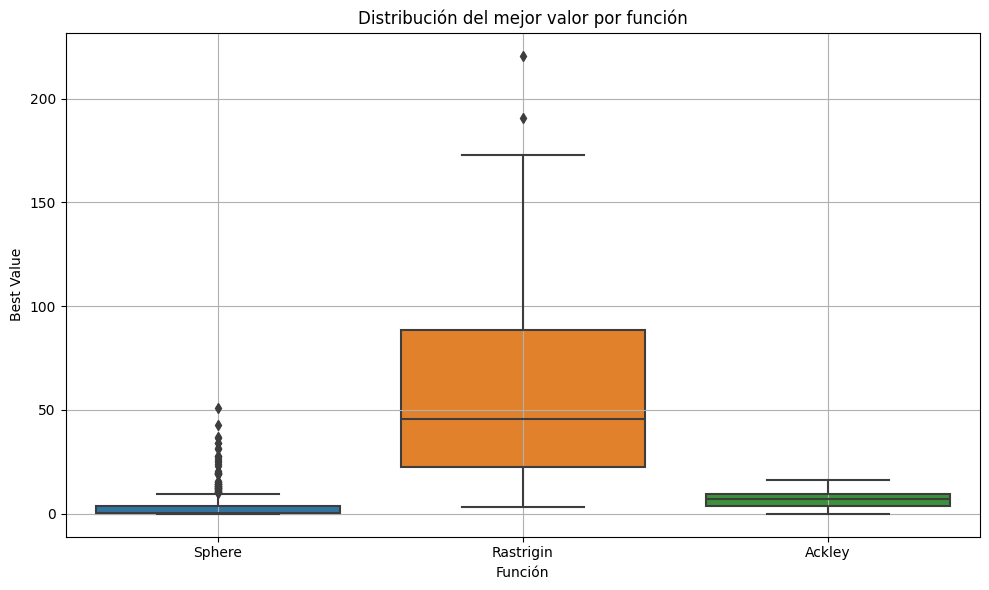

In [ ]:
# Boxplot para visualizar la distribución de los mejores valores alcanzados por cada función objetivo.

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Function", y="Best Value")
plt.title("Distribución del mejor valor por función")
plt.xlabel("Función")
plt.ylabel("Best Value")
plt.grid(True)
plt.tight_layout()
plt.show()


La gráfica de arriba muestra el valor mínimo alcanzado por el algoritmo PSO en cada una de las funciones objetivo. Un menor valor indica un mejor rendimiento del algoritmo al encontrar el mínimo global de la función.

- En la función **Sphere**, el PSO consigue llegar muy cerca de cero, que es el mínimo absoluto, lo cual es esperable porque esta función es convexa y suave.
- En la función **Rastrigin**, el valor mínimo es más alto debido a la naturaleza altamente multimodal de esta función (tiene muchos mínimos locales), lo que dificulta más la optimización.
- En la función **Ackley**, el PSO también obtiene un valor muy bajo, lo que indica que logró escapar de mínimos locales.

Esta comparación es muy útil para visualizar qué tan bien se comporta el PSO con funciones de distinta dificultad.


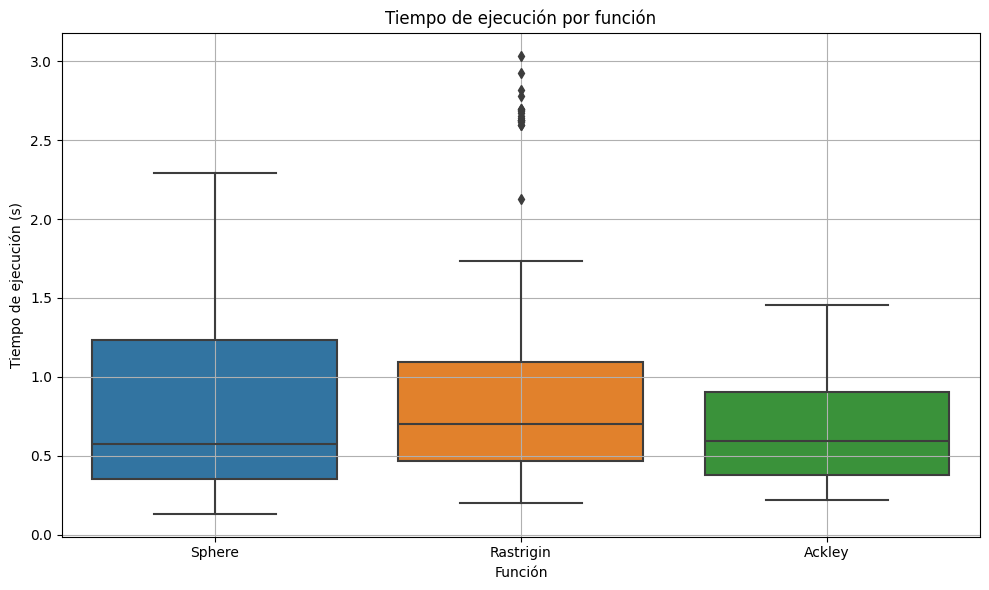

In [14]:
# Boxplot que muestra el tiempo de ejecución para cada función, permitiendo comparar su coste computacional.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Function", y="Execution Time")
plt.title("Tiempo de ejecución por función")
plt.xlabel("Función")
plt.ylabel("Tiempo de ejecución (s)")
plt.grid(True)
plt.tight_layout()
plt.show()


Esta gráfica muestra la distribución del tiempo de ejecución del algoritmo PSO en segundos para cada función objetivo.

- En general, los tiempos de ejecución son similares entre funciones, aunque se observan algunos **valores atípicos**, sobre todo en la función **Rastrigin**. Esto puede ser por la complejidad de la función, que obliga al algoritmo a hacer más evaluaciones para encontrar soluciones aceptables.
- **Sphere** y **Ackley** muestran distribuciones de tiempo más estables, aunque Sphere tiene mayor variabilidad (rangos más amplios).
- La **mediana** del tiempo es menor en Ackley, lo que indica que es la función que se optimiza más rápido de forma más consistente en nuestras ejecuciones.

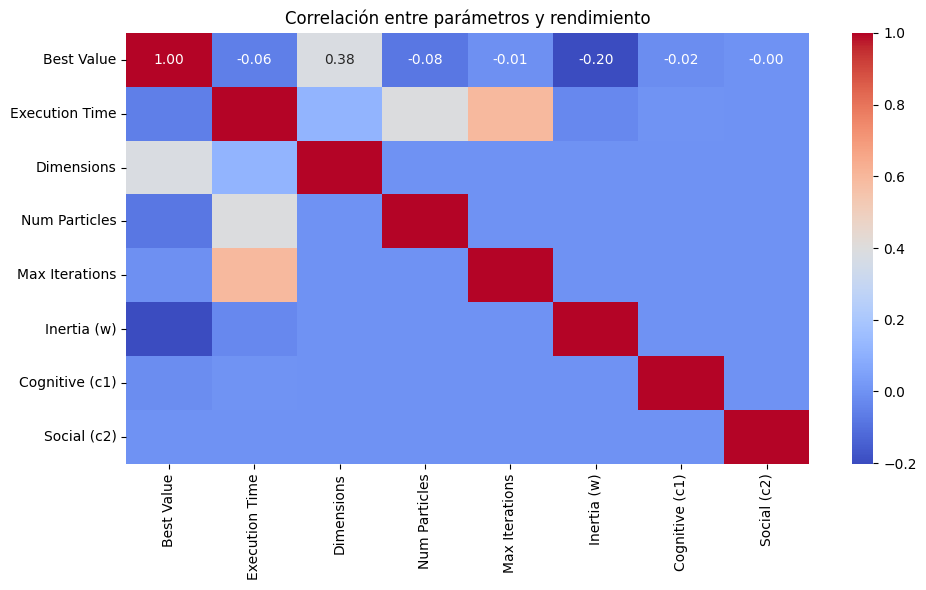

In [15]:
# Mapa de calor que representa la correlación entre los hiperparámetros, el tiempo de ejecución y el valor óptimo obtenido.
plt.figure(figsize=(10, 6))
corr = df[[
    "Best Value", "Execution Time", "Dimensions", "Num Particles",
    "Max Iterations", "Inertia (w)", "Cognitive (c1)", "Social (c2)"
]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlación entre parámetros y rendimiento")
plt.tight_layout()
plt.show()


Este mapa de calor muestra cómo se relacionan los diferentes parámetros del PSO y las métricas de rendimiento, como el `Best Value` y el tiempo de ejecución.

- El valor de correlación va de -1 a 1. Valores cercanos a **1** indican que las variables suben juntas, y valores cercanos a **-1** que una sube mientras la otra baja.
- Se ve que el parámetro **`w` (inercia)** tiene una correlación negativa moderada con el `Best Value`, lo que indica que cuanto mayor es `w`, mejor suele ser el resultado.
- También se nota que cuando aumentan las **dimensiones**, tanto el `Best Value` como el tiempo de ejecución tienden a subir, lo cual es normal porque el problema se complica.
- Por otro lado, aumentar el número de partículas o las iteraciones sí afecta al tiempo, pero no parece mejorar mucho el resultado final.
- En general, los valores de `c1` y `c2` no parecen tener una relación clara con el rendimiento, así que probablemente su efecto dependa más de la combinación con otros parámetros.


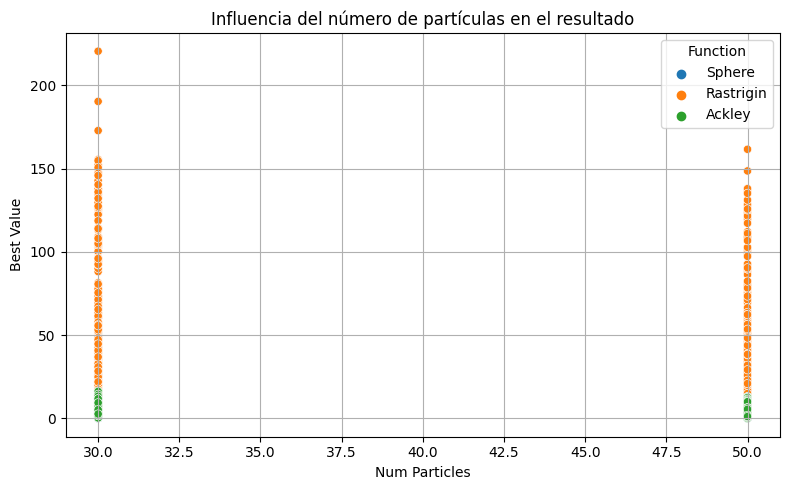

In [16]:
# Gráfico de dispersión que muestra la relación entre el número de partículas y el mejor valor alcanzado por función.
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Num Particles", y="Best Value", hue="Function")
plt.title("Influencia del número de partículas en el resultado")
plt.grid(True)
plt.tight_layout()
plt.show()


Este gráfico de dispersión permite analizar la influencia del número de partículas (`Num Particles`) en el valor óptimo (`Best Value`) alcanzado por el algoritmo PSO para cada función.

- En general se observa una **tendencia a mejorar los resultados** (valores más bajos de `Best Value`) al incrementar el número de partículas de **30 a 50** que son los valores que se han usado.
- Esta mejora es más clara en funciones complejas como **Rastrigin**, donde la dispersión de los resultados con 30 partículas es mayor y con 50 ya se agrupan un poco m´s.
- En funciones más simples como **Sphere** o **Ackley**, el cambio entre 30 y 50 partículas **no supone una mejora significativa**, lo que sugiere que con pocas partículas ya se alcanza una exploración bastante buena.
- Esto indica que **aumentar el número de partículas puede ser beneficioso en funciones más difíciles**, pero también puede implicar mayor coste computacional.

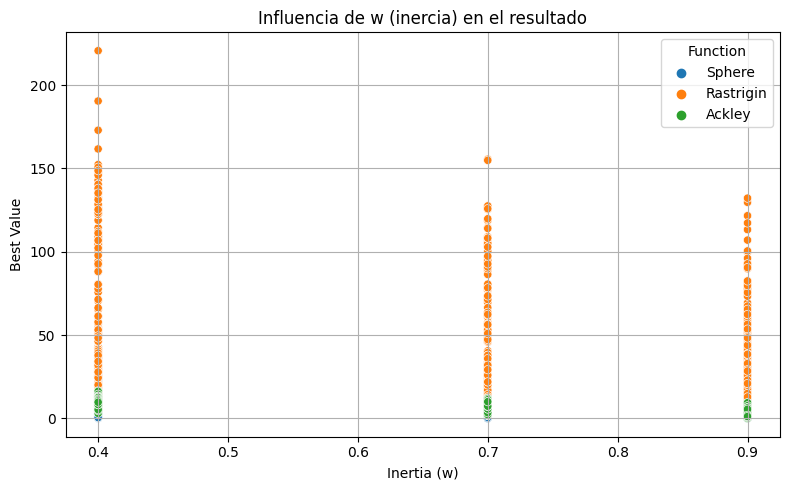

In [17]:
# Gráfico de dispersión que analiza cómo afecta el valor del coeficiente de inercia (w) al mejor valor obtenido.
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Inertia (w)", y="Best Value", hue="Function")
plt.title("Influencia de w (inercia) en el resultado")
plt.grid(True)
plt.tight_layout()
plt.show()


Este gráfico muestra cómo afecta el valor del coeficiente de inercia (`w`) al rendimiento del algoritmo PSO, usando como referencia el `Best Value` que se ha conseguido para cada función.

- En general, se puede ver que **cuando `w` es más alto (por ejemplo 0.9)**, los resultados suelen ser **mejores o más compactos**, sobre todo en funciones más difíciles como **Rastrigin**.
- En el caso de **Sphere** y **Ackley**, el impacto de `w` no es tan claro ya que el algoritmo converge bien incluso con valores bajos de inercia. Por ejemplo, los resultados de la función **Sphere** no son casi visibles ya que convergen casi en el 0 y se solapan con los de la función **Ackley**.
- Esto tiene sentido, porque **una inercia alta ayuda a explorar más el espacio de búsqueda**, mientras que una más baja hace que se centre en explotar zonas concretas. Para funciones complejas, explorar más al principio puede evitar que se quede atrapado en óptimos locales.

Esta gráfica indica que conviene **usar valores altos de `w` en funciones más complicadas**, y ajustar este parámetro en función del tipo de problema.


### 5. Comparativa con la librería `pyswarm`

En este apartado se realiza una comparación entre la implementación propia del algoritmo PSO y la librería externa `pyswarm`. Para ello, se utilizan las funciones objetivo `Sphere`, `Rastrigin` y `Ackley` bajo las mismas condiciones: dimensiones, número de partículas, límites y número de iteraciones.


In [ ]:
# Para poder importar mi algoritmo PSO desde el directorio src al notebook
import sys
import os

# Ruta absoluta al directorio 'src'
src_path = os.path.abspath(os.path.join(os.getcwd(), "..", "src"))
if src_path not in sys.path:
    sys.path.append(src_path)


In [ ]:
from src.PSO.pso_algorithm import PSO
from pyswarm import pso
import numpy as np

# Parámetros para ambas implementaciones para que sea justa la comparativa, 
# el resto de parámetros son equivalentes ya que los he puesto como los de pyswarm
dimensions = 30            
bounds = (-10, 10)         
lb = [bounds[0]] * dimensions # Límites por dimensión requeridos por pyswarm
ub = [bounds[1]] * dimensions # Límites por dimensión requeridos por pyswarm
maxiter = 300              
swarm_size = 100 # En mi caso se llama num_particles


# Diccionario de funciones para comparar (las mismas que en app.py)
functions_compare = {
    "Sphere": lambda x: sum(np.square(x)),
    "Rastrigin": lambda x: 10 * len(x) + sum([(xi**2 - 10 * np.cos(2 * np.pi * xi)) for xi in x]),
    "Ackley": lambda x: -20 * np.exp(-0.2 * np.sqrt(np.mean(np.square(x)))) \
                        - np.exp(np.mean([np.cos(2 * np.pi * xi) for xi in x])) + 20 + np.e
}

# Comparar ambas implementaciones
print("Comparación de PSO propio vs pyswarm:\n")
for name, func in functions_compare.items():
    # pyswarm
    best_pos_pyswarm, best_val_pyswarm = pso(func, lb, ub, swarmsize=swarm_size, maxiter=maxiter, debug=False)
    
    # implementación mia
    pso_custom = PSO(num_particles=swarm_size, dimensions=dimensions, bounds=bounds, objective_function=func, max_iterations=maxiter)
    best_pos_custom, best_val_custom, _ = pso_custom.optimize()
    
    # Mostrar resultados
    print(f"Función: {name}")
    print(f"  pyswarm -> Mejor valor: {best_val_pyswarm:.6f}")
    print(f"  propio  -> Mejor valor: {best_val_custom:.6f}\n")


Comparación de PSO propio vs pyswarm:

Stopping search: Swarm best position change less than 1e-08
Función: Sphere
  pyswarm -> Mejor valor: 48.713729
  propio  -> Mejor valor: 0.050497

Stopping search: Swarm best position change less than 1e-08
Función: Rastrigin
  pyswarm -> Mejor valor: 120.383494
  propio  -> Mejor valor: 109.394677

Stopping search: Swarm best objective change less than 1e-08
Función: Ackley
  pyswarm -> Mejor valor: 4.371495
  propio  -> Mejor valor: 3.019271



### 6. Conclusión de la Comparativa

Después de comparar mi implementación de PSO con la librería `pyswarm`, he visto que los resultados varían según la función que se optimiza. Por ejemplo, en la función **Sphere**, mi algoritmo consiguió un valor final mejor. En cambio, con **Rastrigin** fue `pyswarm` el que obtuvo un resultado más bajo. En **Ackley**, el rendimiento fue bastante parecido, aunque mi versión quedó un poco por delante.

Estas variaciones pueden deberse a varios factores, como la forma en que se inicializan las partículas, el criterio de parada utilizado de pyswarm o pequeños detalles en la implementación del algoritmo.

Esto demuestra que mi implementación funciona bien y es capaz de competir con una librería conocida como `pyswarm`. Aunque no siempre gane, los resultados están en rangos razonables y se comporta de forma estable. Al final, depende mucho del tipo de problema y de los parámetros que se usen.
